In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
from datetime import date, datetime, timedelta
import matplotlib
from IPython.display import Image, clear_output
import math
from ipywidgets import interact, interactive
from IPython.core.display import display, HTML
import pickle
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
from scipy import stats

## Build basic test data

In [ ]:
# datetimes for frame timing

#data points (x_position, y_position, timestamp)

In [5]:
current_time_string = datetime.utcnow()

In [6]:
current_time_string

datetime.datetime(2019, 10, 25, 15, 47, 9, 654840)

In [8]:
timedelta(milliseconds = 1)

datetime.timedelta(0, 0, 1000)

In [13]:
frame_rate = 120
frame_gap = timedelta(seconds = 1/frame_rate)

In [ ]:
start_time = datetime.utcnow()

In [14]:
#unit = inch

pixels_per_unit = 30
units_per_pixel = 1/pixels_per_unit

In [81]:
mph_to_pps = 5280*12*pixels_per_unit/3600

#### Test data 1

In [18]:
# straight across
# Say 36 inches at 20 mph

In [193]:
speed_mph = 20
speed_ips = speed_mph*5280*12/3600
speed_pps = speed_ips * pixels_per_unit
print(speed_ips)
print(speed_pps)

352.0
10560.0


In [34]:
pixel_distance = 36 * pixels_per_unit
total_time = pixel_distance / speed_pps

In [35]:
total_time

0.10227272727272728

In [43]:
number_of_frames = math.floor(total_time * frame_rate)
print(number_of_frames)

12


In [41]:
times = [start_time + i * frame_gap for i in range(number_of_frames)]

In [44]:
x_change = speed_pps / frame_rate
y_change = 0

x_positions = [0 + i * x_change for i in range(number_of_frames)]
y_positions = [0 + i * y_change for i in range(number_of_frames)]

In [60]:
data_1 = (x_positions, y_positions, times)

In [64]:
data_file = 'sample_position_data_1.pickle'
with open(data_file, 'wb') as f:
    pickle.dump(data_1, f)

#### Test data 2

In [ ]:
# varied speed, straight across

In [179]:
times = [start_time + i * frame_gap for i in range(number_of_frames)]

In [180]:
x_positions = [0.0,20.0,50.0,90.0,140.0,200.0,270.0,350.0,450.0,550.0,720.0,968.0]
y_positions = [0 + i * y_change for i in range(number_of_frames)]

In [181]:
data_2 = (x_positions, y_positions, times)

In [182]:
data_file = 'sample_position_data_2.pickle'
with open(data_file, 'wb') as f:
    pickle.dump(data_2, f)

#### Test data 3

In [ ]:
# varied speed, straight across

In [183]:
times = [start_time + i * frame_gap for i in range(number_of_frames)]

In [184]:
x_positions = [0.0,20.0,50.0,90.0,140.0,200.0,270.0,350.0,450.0,550.0,720.0,968.0]

In [185]:
data_3 = (x_positions, x_positions, times)

In [187]:
data_file = 'sample_position_data_3.pickle'
with open(data_file, 'wb') as f:
    pickle.dump(data_3, f)

## Test Calculations

#### Constant averaging as data is collected

In [204]:
def simulate_stream_of_values(X_full, Y_full, T_full):
    X = []
    Y = []
    T = []
    V = np.array([])
    for i in range(len(X_full)):
        x = X_full[i]
        y = Y_full[i]
        t = T_full[i]
        X.append(x)
        Y.append(y)
        T.append(t)

        if len(X) > 1:
            delta_x = X[i] - X[i-1]
            delta_y = Y[i] - Y[i-1]
            delta_t = T[i] - T[i-1]
            delta_p = math.sqrt(delta_x**2 + delta_y**2)
            v = delta_p / delta_t.total_seconds()
            V = np.append(V, v)
            avg_v_mpg = np.mean(V[-3:]) / mph_to_pps
            print(avg_v_mpg)

In [205]:
def plot_and_simulate_data_set(data):
    X_full = data[0]
    Y_full = data[1]
    T_full = data[2]
    plt.scatter(X_full, Y_full, s = 20, c = [(dt - T_full[0]).total_seconds() for dt in T_full])
    simulate_stream_of_values(X_full, Y_full, T_full)

20.00080003200128
20.00080003200128
20.00080003200128
20.00080003200128
20.00080003200128
20.00080003200128
20.00080003200128
20.00080003200128
20.00080003200128
20.00080003200128
20.00080003200128


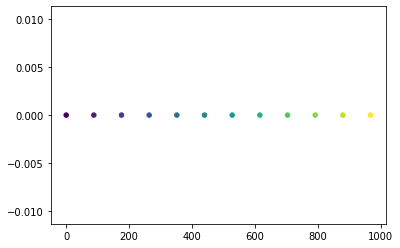

In [206]:
plot_and_simulate_data_set(data_1)

4.545636370909381
5.682045463636727
6.818454556364073
9.091272741818763
11.364090927273454
13.636909112728146
15.909727298182837
18.94015154545576
21.212969730910448
28.031424287274522
39.24399400218433


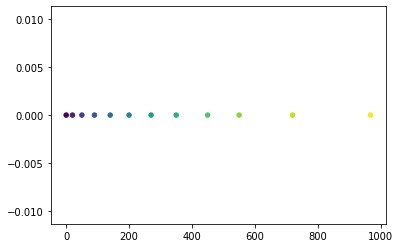

In [207]:
plot_and_simulate_data_set(data_2)

6.428500605356464
8.03562575669558
9.642750908034698
12.857001210712928
16.07125151339116
19.285501816069395
22.499752118747626
26.785419188985266
29.9996694916635
39.642420399698196
55.49938855957747


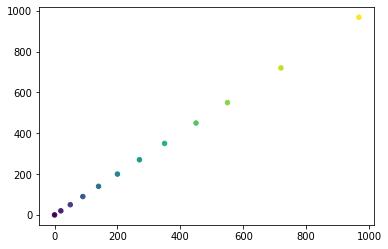

In [208]:
plot_and_simulate_data_set(data_3)

#### Yield shit

In [101]:
def add_data_get_velocity(x, y, t, point_over):
    X = [x]
    Y = [y]
    T = [t]
    V = np.array([])
    yield 0
    i = 1
    while not point_over:
        X.append(x)
        Y.append(y)
        T.append(t)
        delta_x = X[i] - X[i-1]
        delta_y = Y[i] - Y[i-1]
        delta_t = T[i] - T[i-1]
        delta_p = math.sqrt(delta_x**2 + delta_y**2)
        v = delta_p / delta_t.total_seconds()
        V = np.append(V, v)
        yield v
        i += 1
        
    return X, Y, T, V
    

In [ ]:
def yield_velocity():
    i = 1
    while True:
        delta_x = X[i] - X[i-1]
        delta_y = Y[i] - Y[i-1]
        delta_t = T[i] - T[i-1]
        delta_p = math.sqrt(delta_x**2 + delta_y**2)
        v = delta_p / delta_t.total_seconds()
        V = np.append(V, v)
        yield v
        i += 1

In [106]:
v0 = add_data_get_velocity(X[0], Y[0], T[0], False)


In [107]:
print(v0)

<generator object add_data_get_velocity at 0x7f2853096678>
